# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Simulation

In [2]:
# number of trials
N_trials = int( 1e3 )

# list for collecting sum od two dice
sums = [ ]


# loop for realizations
for _n in range( N_trials ):
    
    # throw dice
    # NOTE: Upper limit is not part of randint
    sample = np.random.randint( 1, 7, size=2 )
    
    # get sum and save
    sums.append( np.sum( sample ) )        

## Determine probability and plot

In [3]:
# theoretical values
Pr_theo = np.array( [ 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1 ] ) / 36.0

Pr_sim = np.zeros_like( Pr_theo )
    
    # loop for possible sums and get relative frequency
for ind_sum, val_sum in enumerate( np.arange( 2, 13) ):

    Pr_sim [ ind_sum ] = np.sum( [ int( s == val_sum ) for s in sums ] ) / N_trials

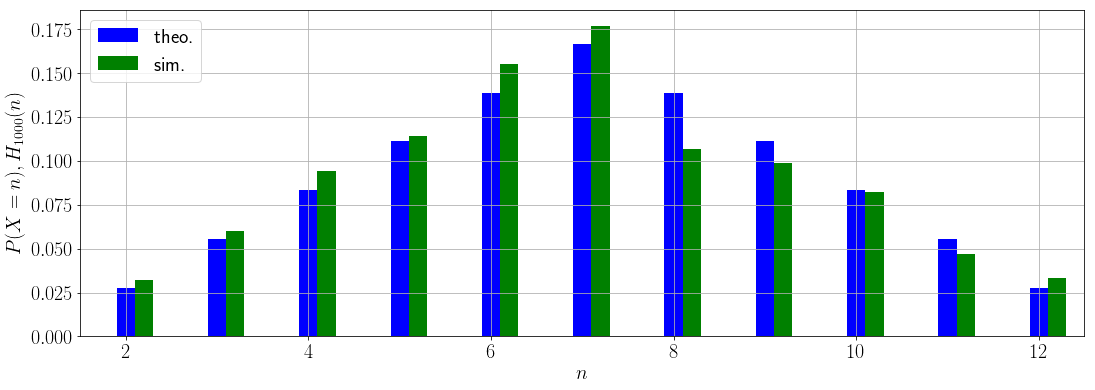

In [4]:
# plotting
plt.figure()    

width = 0.2
plt.bar( np.arange(2, 13), Pr_theo, linewidth=2.0, width=width, color='b', label='theo.')
plt.bar( np.arange(2, 13)+width, Pr_sim, linewidth=2.0, color='g', width=width, label='sim.')

plt.xlabel('$n$')
plt.ylabel('$P(X=n), H_{{{}}}(n)$'.format( int(N_trials) ) )
plt.xlim( (1.5,12.5) )
plt.grid( True )
plt.legend( loc = 'upper left' )

## Get cdf and plot

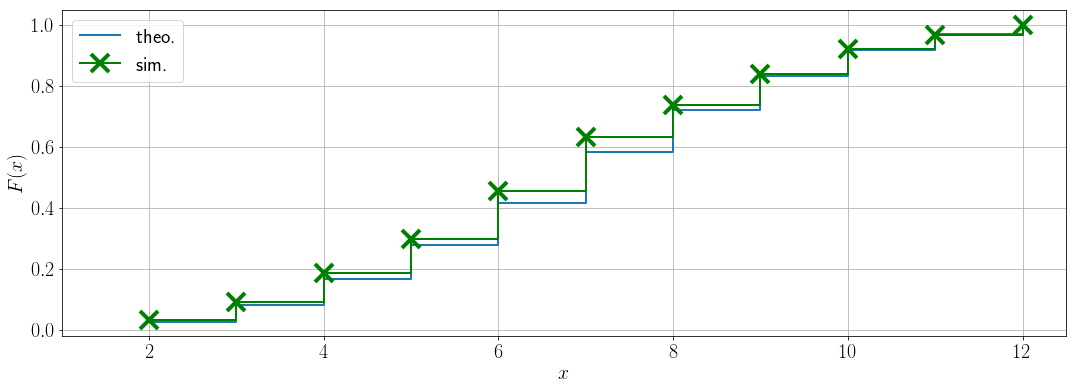

In [6]:
# cdf
F_theo = np.cumsum( Pr_theo )         
F_sim = np.cumsum( Pr_sim )

# plotting
plt.figure()

plt.step( np.arange(2, 13) , F_theo, linewidth=2.0, label='theo.', where='post')
plt.step( np.arange(2, 13) , F_sim, '-xg', mew=4, ms=18, linewidth=2.0, label='sim.', where='post')    

plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.xlim( (1,12.5) )
plt.grid( True )
plt.legend( loc = 'upper left' )